<a href="https://colab.research.google.com/github/marsred/The_School_Of_AI/blob/master/Copy_of_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


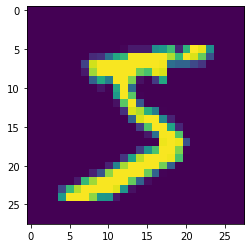

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
print (X_train.shape)
#print (X_train[:10])

(60000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [149]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(64, 3))
model.add(Convolution2D(128, 3)) #-> 22x22x512
model.add(MaxPooling2D(2))
model.add(Convolution2D(32, 1, activation='relu')) #-> 11x11x32
model.add(Convolution2D(64, 3)) #-> 9x9x64
model.add(Convolution2D(128, 3)) #-> 7x7x128
model.add(MaxPooling2D(2))
model.add(Convolution2D(10, 1, activation='relu')) #-> 11x11x32
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [150]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 11, 11, 32)        4128      
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 7, 7, 128)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [164]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1)

Epoch 1/10
 1792/60000 [..............................] - ETA: 6s - loss: 0.0064 - acc: 0.9967

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 6s 95us/step - loss: 0.0067 - acc: 0.9983
Epoch 2/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0052 - acc: 0.9987
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0077 - acc: 0.9980
Epoch 4/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0098 - acc: 0.9979
Epoch 5/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0049 - acc: 0.9988
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0071 - acc: 0.9984
Epoch 7/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0096 - acc: 0.9977
Epoch 8/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0077 - acc: 0.9985
Epoch 9/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0073 - acc: 0.9983
Epoch 10/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0020 - acc: 0.9995


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [166]:
print(score)

[0.08115246505412937, 0.99]


In [0]:
y_pred = model.predict(X_test)

In [168]:
print(y_pred[:9])
print(y_test[:9])

[[0.0000000e+00 0.0000000e+00 4.6346064e-28 4.2715239e-27 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.2533194e-38 6.5080969e-37]
 [1.4008110e-30 1.7987159e-25 1.0000000e+00 1.2181246e-28 0.0000000e+00
  0.0000000e+00 1.3363940e-36 0.0000000e+00 5.8505068e-24 0.0000000e+00]
 [2.0822669e-27 1.0000000e+00 1.3760812e-24 3.9446364e-29 3.2798701e-14
  3.1846080e-22 1.3529881e-21 3.4447477e-15 4.2660904e-17 2.5245491e-17]
 [1.0000000e+00 1.6492458e-27 5.4669803e-23 1.9490560e-26 8.9987052e-26
  1.7970709e-24 5.0723949e-16 2.0880337e-27 8.0640265e-24 3.3830752e-21]
 [7.5936665e-35 1.4178702e-29 5.1303973e-34 1.3715344e-36 1.0000000e+00
  1.8195382e-31 2.3767073e-28 2.6637889e-34 2.7732362e-24 7.3655931e-13]
 [3.8149156e-34 1.0000000e+00 7.1665817e-23 6.4897730e-38 3.2621882e-18
  6.7895204e-34 2.9120581e-28 5.6314622e-18 2.5905897e-22 4.9634477e-22]
 [0.0000000e+00 1.4563718e-33 1.9370217e-38 0.0000000e+00 1.0000000e+00
  1.5837435e-26 0.0000000e+00 2.1874354e-23 1.8160690e-18 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

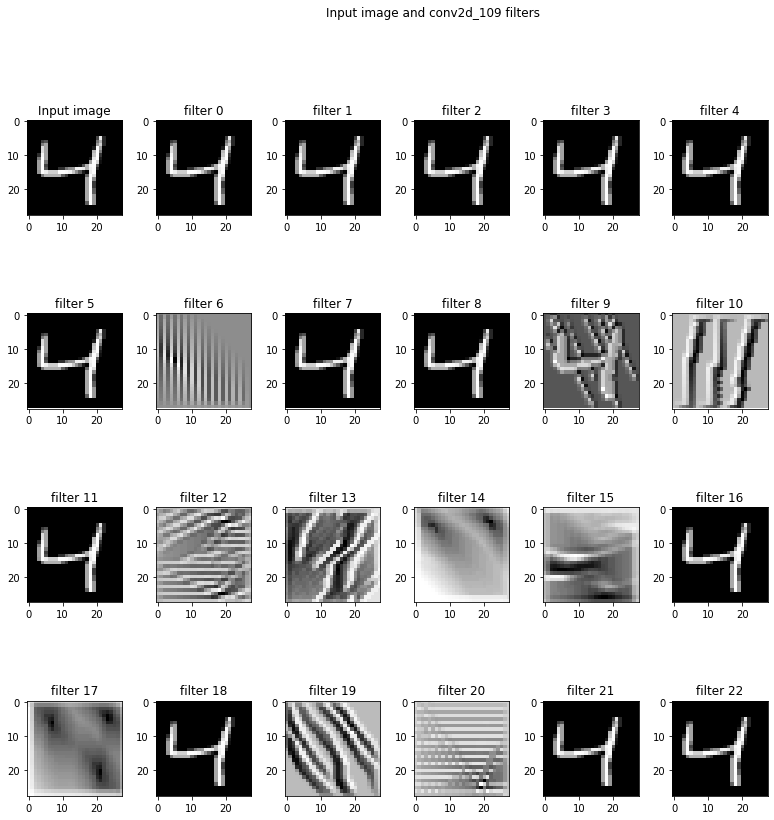

In [170]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_109'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()